In [ ]:
import pandas as pd 
import numpy as np
from google.colab import data_table
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
def visual(inp):
  data_table.DataTable.max_columns=100
  return data_table.DataTable(inp)

In [ ]:
df=pd.read_csv("/content/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",low_memory=False)
df.shape

(13434, 79)

In [ ]:
print(df.isnull().sum(axis=0).sort_values(ascending=False))

In [ ]:
df.dropna(subset=['Flow Bytes/s'],inplace=True)

In [ ]:
print(df.isnull().sum(axis=0).sort_values(ascending=False))

In [ ]:
label_uniques=df[" Label"].unique()
df[" Label"].value_counts(dropna=False)

DDoS      128027
BENIGN     97714
Name:  Label, dtype: int64

In [ ]:
non_numeric_label={"BENIGN":0,"DDoS":1}
df[" Label"]=df[" Label"].map(non_numeric_label)

In [ ]:
df[" Label"].value_counts(dropna=False)
# 0 represent for no attack
# 1 represents for DDoS attack

1    128027
0     97714
Name:  Label, dtype: int64

In [ ]:
visual(df.tail(5))

In [ ]:
df.describe()

In [ ]:
# print(df[['Flow Bytes/s']].max())
# print(df[[' Flow Packets/s']].max())
df=df.drop('Flow Bytes/s',axis='columns')
df=df.drop(' Flow Packets/s',axis='columns')
# df=df.drop(' Flow Packets/s',axis='columns')

In [ ]:
column_list=df.columns.tolist()
column_list

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
for i in column_list:
  try:
    if (i== ' Destination Port'):
      continue
    else:
      df[[f"{i}"]] = scaler.fit_transform(df[[f"{i}"]])
  except ValueError:
    continue

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df[' Label'] = df[' Label'].astype('int64')

In [ ]:
visual(df.describe())

In [ ]:
df.info()

In [ ]:
friday=df.to_numpy()
friday.shape

(225741, 77)

In [ ]:
n_samples, n_features= friday.shape
n_features=n_features-1

X=friday[:,0:n_features]
Y=friday[:,n_features]
feature_names=X[0,0:n_features]

print(X.shape)
print(Y.shape)

(225741, 76)
(225741,)


In [ ]:
folds=StratifiedKFold(n_splits=10)
folds

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,train_size=0.3)

In [ ]:
def output(model, x_train,x_test,y_train,y_test):
  y_pred = cross_val_predict(model, x_train, y_train, cv=2)
  print(f"Accuracy_score: {accuracy_score(y_pred,y_train)*100}",)
  print(f"precision_score: {precision_score(y_train, y_pred)*100}")
  print(f"recall_score: {recall_score(y_train, y_pred)*100}")
  print(f"f1_score: {f1_score(y_train, y_pred)*100}")
  matrix=confusion_matrix(y_train, y_pred)
 
  fig, ax = plot_confusion_matrix(conf_mat=matrix, figsize=(6, 6), cmap=plt.cm.Greens)
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()

Accuracy_score: 88.28888692005552
precision_score: 82.92719679683127
recall_score: 100.0
f1_score: 90.66688633394918


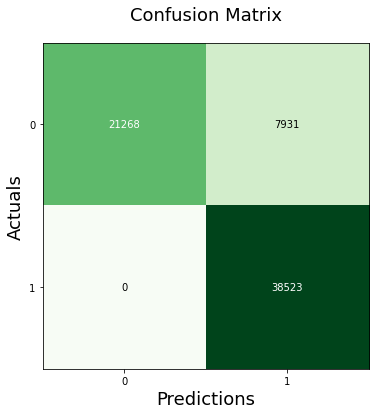

In [ ]:
output(LogisticRegression(solver='liblinear',multi_class='ovr'),x_train,x_test,y_train,y_test)

Accuracy_score: 99.96456099937981
precision_score: 99.98961227828707
recall_score: 99.94808296342444
f1_score: 99.96884330780215


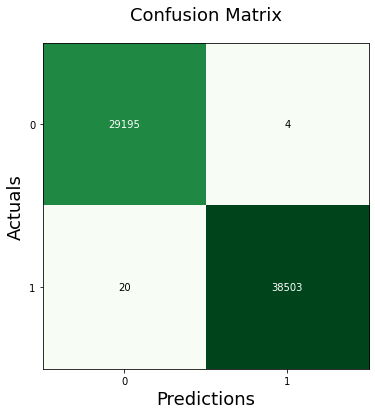

In [ ]:
output(RandomForestClassifier(n_estimators=15),x_train,x_test,y_train,y_test)

Accuracy_score: 99.96160774932814
precision_score: 99.9922083993455
recall_score: 99.94029540793812
f1_score: 99.96624516397061


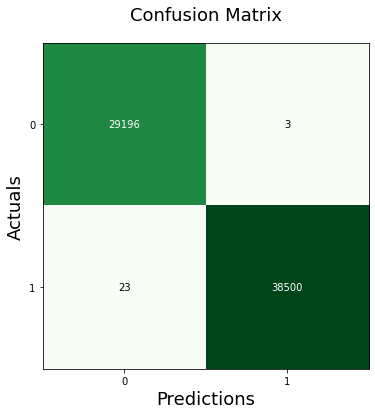

In [ ]:
output(RandomForestClassifier(n_estimators=30),x_train,x_test,y_train,y_test)

Accuracy_score: 99.97194412450902
precision_score: 99.99740300212953
recall_score: 99.953274667082
f1_score: 99.97533396513002


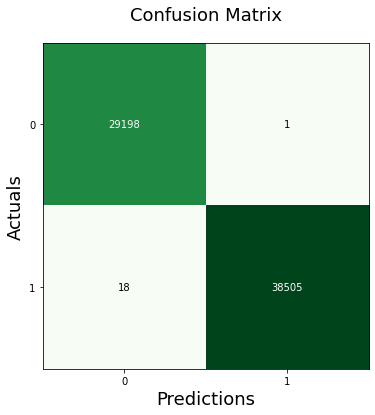

In [ ]:
output(RandomForestClassifier(n_estimators=60),x_train,x_test,y_train,y_test)

In [ ]:
output(SVC(gamma='auto'),x_train,x_test,y_train,y_test)

Accuracy_score: 99.322229113139
precision_score: 98.84508777332923
recall_score: 99.97663733354099
f1_score: 99.40764257230245


In [ ]:
from sklearn import tree
output(tree.DecisionTreeClassifier(),x_train,x_test,y_train,y_test)

Accuracy_score: 99.95570124922477
precision_score: 99.96625042186973
recall_score: 99.95587051891079
f1_score: 99.96106020092937


In [ ]:
from sklearn.naive_bayes import GaussianNB
output(GaussianNB(),x_train,x_test,y_train,y_test)

Accuracy_score: 96.13419568234842
precision_score: 93.63651831506283
recall_score: 100.0
f1_score: 96.71369752962443


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
output(KNeighborsClassifier(n_neighbors = 1),x_train,x_test,y_train,y_test)

Accuracy_score: 99.9822804996899
precision_score: 99.98182998053213
recall_score: 99.98702074085611
f1_score: 99.98442529332364
